### Import Libraries and Dataset

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv(r'world_food_production new.csv')

### Data Cleaning

In [80]:
df1 = df.copy()
df1.drop(columns=['Country','2020','2010','2000','1990'], inplace=True)
# Melt the DataFrame to long format
df_long = pd.melt(df1, id_vars=['year'], var_name='Crop', value_name='Production')
# Calculate the percentage of crops produced each year
df_long['Percentage'] = df_long.groupby('year')['Production'].transform(lambda x: x / x.sum() * 100)

df2 = df.copy()

df2 = df2[['Country', '2020']]
df2 = df2[df2['Country']!='0']



# Visualize the Key Aspects of the Small Dataset

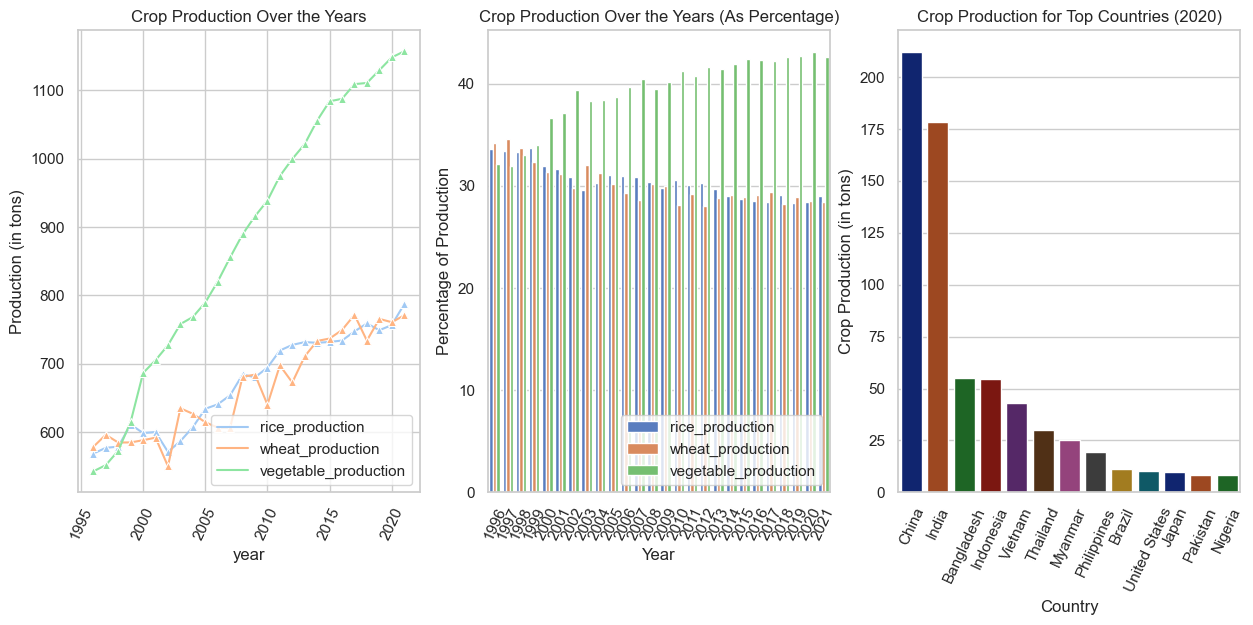

In [81]:
# Set up subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), sharex=False)

# Line plot
sns.set(style="whitegrid")
sns.lineplot(x='year', y='Production', hue='Crop', data=df_long, marker='^', ax=ax1, palette='pastel')

# Adding labels and title
ax1.set_ylabel('Production (in tons)')
ax1.set_title('Crop Production Over the Years')
ax1.legend(loc='lower right')

# Stacked bar plot
sns.set(style="whitegrid")
sns.barplot(x='year', y='Percentage', hue='Crop', data=df_long, palette='muted', ci=None, dodge=True, ax=ax2)

# Adding labels and title
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage of Production')
ax2.set_title('Crop Production Over the Years (As Percentage)')
ax2.legend(loc='lower right')

# Bar plot
sns.set(style="whitegrid")
sns.barplot(x='Country', y='2020', data=df2, ax=ax3, palette='dark')

# Adding labels and title
ax3.set_ylabel('Crop Production (in tons)')
ax3.set_title('Crop Production for Top Countries (2020)')

# Rotate x-axis labels for better visibility
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='x', rotation=65)

# Show the plot
plt.show()